# Comprehensive Comparison of Machine Learning Algorithms for Diabetes Prediction

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Load the data

In [2]:
data = pd.read_csv("diabetes.csv", encoding="ISO-8859-1")
print(data.shape)

(768, 9)


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Separate features and labels

In [4]:
X = data.drop("Outcome", axis=1)  # Assuming "Outcome" is the target column
y = data["Outcome"]

# Split the data into training and testing sets


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating a StandardScaler object to scale the features. Feature scaling is crucial for some machine learning algorithms.
* X_train_scaled and X_test_scaled store the scaled training and testing data, respectively.

# Perform feature selection based on correlation


In [7]:
num_features_to_select = 5  # You can adjust this number as needed
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

##### These lines perform feature selection based on correlation using the SelectKBest method with f_classif as the scoring function. It selects the top num_features_to_select features with the highest correlation with the target variable.
* X_train_selected and X_test_selected store the selected features for training and testing data.

# Initializing various machine learning models for classification:
* rf_model: A Random Forest Classifier.
* dt_model: A Decision Tree Classifier.
* knn_model: A K-Nearest Neighbors Classifier.
* nb_model: A Gaussian Naive Bayes Classifier.
* lr_model: A Logistic Regression Classifier with an increased max_iter parameter set to 1000 to avoid convergence issues.
* svm_model: A Support Vector Machine Classifier.

In [8]:
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC()

# Train the models

In [9]:
rf_model.fit(X_train_selected, y_train)
dt_model.fit(X_train_selected, y_train)
knn_model.fit(X_train_selected, y_train)
nb_model.fit(X_train_selected, y_train)
lr_model.fit(X_train_selected, y_train)
svm_model.fit(X_train_selected, y_train)

SVC()

# Make predictions with the models

In [10]:
rf_pred = rf_model.predict(X_test_selected)
dt_pred = dt_model.predict(X_test_selected)
knn_pred = knn_model.predict(X_test_selected)
nb_pred = nb_model.predict(X_test_selected)
lr_pred = lr_model.predict(X_test_selected)
svm_pred = svm_model.predict(X_test_selected)

# Evaluate the model performance


In [11]:
rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print the accuracy of each model

In [12]:
print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)

Random Forest Accuracy: 0.7662337662337663
Decision Tree Accuracy: 0.7402597402597403
K-Nearest Neighbors Accuracy: 0.7337662337662337
Naive Bayes Accuracy: 0.7532467532467533
Logistic Regression Accuracy: 0.7532467532467533
Support Vector Machine Accuracy: 0.7662337662337663


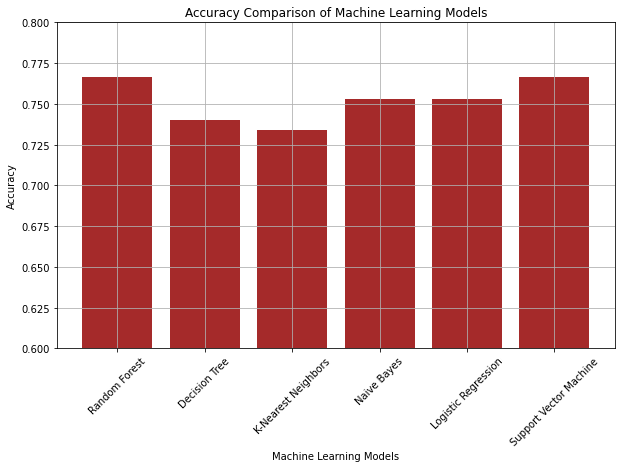

In [13]:
# List of model names for the x-axis
model_names = ["Random Forest", "Decision Tree", "K-Nearest Neighbors", "Naive Bayes", "Logistic Regression", "Support Vector Machine"]
# List of accuracy scores for the y-axis
accuracy_scores = [rf_accuracy, dt_accuracy, knn_accuracy, nb_accuracy, lr_accuracy, svm_accuracy]
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='brown')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.ylim(0.6, 0.8)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()
plt.show()

##### Finally, these lines print the accuracy of each model on the testing data. This provides you with a clear evaluation of how well each machine learning algorithm performed in predicting diabetes. The printed accuracies give you insights into the relative performance of each model.

SVM and Random Forest algorithms require fewer input data compared to other machine learning algorithms. This makes them suitable for less intensive applications with a smaller dataset